In [ ]:
# Importing necessary libraries

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import (
    accuracy_score, rand_score, precision_score,
    recall_score, adjusted_rand_score, normalized_mutual_info_score,
    f1_score, homogeneity_score, completeness_score, v_measure_score,
    calinski_harabasz_score, davies_bouldin_score, silhouette_score)

In [ ]:
def plot_clustering(X, y, y_pred):
  plt.figure(figsize=(15, 5))
  plt.subplot(131)
  plt.scatter(X[:, 0], X[:, 1]) # -->  raw data scatter plot
  plt.title("Incorrect Number of Clusters")

  plt.subplot(132)
  plt.scatter(X[:, 0], X[:, 1], c=y) # -->  scatter plot with coloring based on the original labels
  plt.title("Original values")

  plt.subplot(133)
  plt.scatter(X[:, 0], X[:, 1], c=y_pred) # --> coloring based on the kmeans prediction
  plt.title("K-means clustering result")

  plt.show()

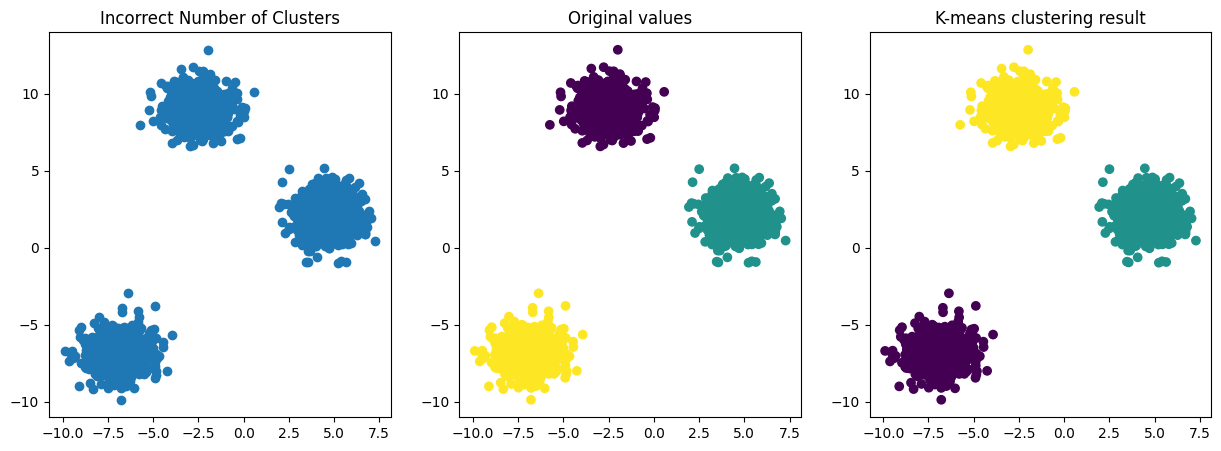

In [ ]:
# Create samples for clustering

n_samples = 1500 # --> sample size
random_state = 42 # --> seed for the random number generation used in cluster centroid initialization
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=3) # --> generate data to be clustered

model = KMeans(n_clusters=3, random_state=random_state, n_init='auto').fit(X) # --> create clustering model as object
y_pred = model.predict(X)

plot_clustering(X, y, y_pred)

In [ ]:
accuracy_score(y, y_pred)

0.3333333333333333

In [ ]:
def print_underscore_text(text):
  print(f"\033[4m{text}\033[0m")

In [ ]:
def evaluate_clustering(X, y, y_pred, model):
  print_underscore_text('External measures:\n')
  print(f'- Rand index: {round(rand_score(y, y_pred), 2)}')
  print(f'- Adjusted Rand index: {round(adjusted_rand_score(y, y_pred), 2)}')
  print(f'- Normalized mutual information: {round(normalized_mutual_info_score(y, y_pred), 2)}')

  print(f'- Homogeneity: {round(homogeneity_score(y, y_pred), 2)}')
  print(f'- Completeness: {round(completeness_score(y, y_pred), 2)}')
  print(f'- V-measure: {round(v_measure_score(y, y_pred), 2)}')

  print_underscore_text('\nInternal measures:\n')

  print(f'- Silhouette Coefficient: {round(silhouette_score(X, model.labels_))}')
  print(f'- Calinski-Harabasz: {round(calinski_harabasz_score(X, model.labels_))}')
  print(f'- Davies-Bouldin: {round(davies_bouldin_score(X, model.labels_))}')

In [ ]:
evaluate_clustering(X, y, y_pred, model)

External measures:

- Rand index: 1.0
- Adjusted Rand index: 1.0
- Normalized mutual information: 1.0
- Homogeneity: 1.0
- Completeness: 1.0
- V-measure: 1.0

Internal measures:

- Silhouette Coefficient: 1
- Calinski-Harabasz: 25006
- Davies-Bouldin: 0


## Number of clusters

External measures:

- Rand index: 0.94
- Adjusted Rand index: 0.87
- Normalized mutual information: 0.91
- Homogeneity: 1.0
- Completeness: 0.83
- V-measure: 0.91

Internal measures:

- Silhouette Coefficient: 1
- Calinski-Harabasz: 18745
- Davies-Bouldin: 1


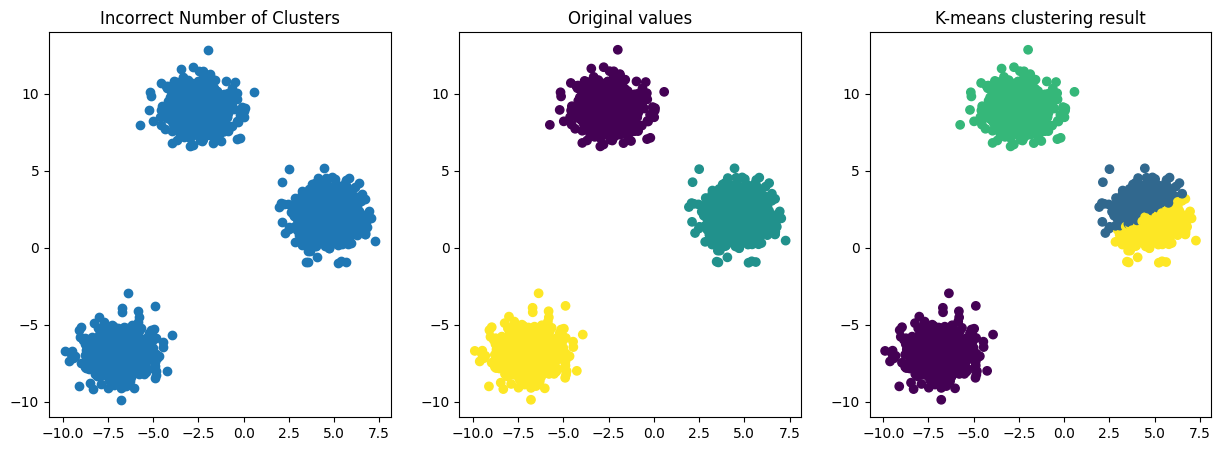

In [ ]:
n_samples = 1500
random_state = 42
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=3)

model = KMeans(n_clusters=4, random_state=random_state, n_init="auto").fit(X)
y_pred = model.predict(X)


evaluate_clustering(X, y, y_pred, model)
plot_clustering(X, y, y_pred)

External measures:

- Rand index: 0.78
- Adjusted Rand index: 0.57
- Normalized mutual information: 0.73
- Homogeneity: 0.58
- Completeness: 1.0
- V-measure: 0.73

Internal measures:

- Silhouette Coefficient: 1
- Calinski-Harabasz: 3866
- Davies-Bouldin: 0


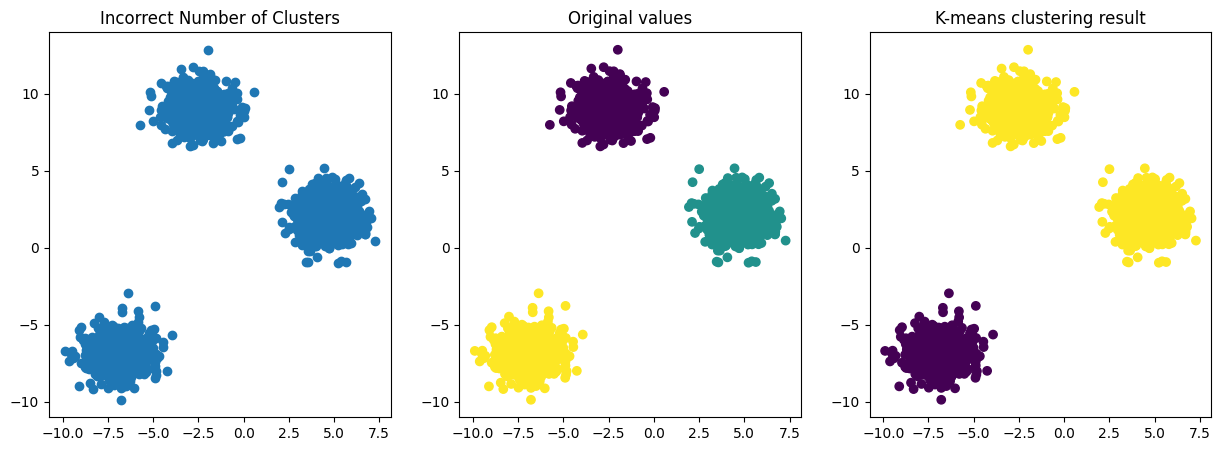

In [ ]:
n_samples = 1500
random_state = 42
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=3)

model = KMeans(n_clusters=2, random_state=random_state, n_init="auto").fit(X)
y_pred = model.predict(X)

evaluate_clustering(X, y, y_pred, model)
plot_clustering(X, y, y_pred)

## Anisotropic data

External measures:

- Rand index: 0.85
- Adjusted Rand index: 0.67
- Normalized mutual information: 0.65
- Homogeneity: 0.65
- Completeness: 0.65
- V-measure: 0.65

Internal measures:

- Silhouette Coefficient: 0
- Calinski-Harabasz: 1789
- Davies-Bouldin: 1


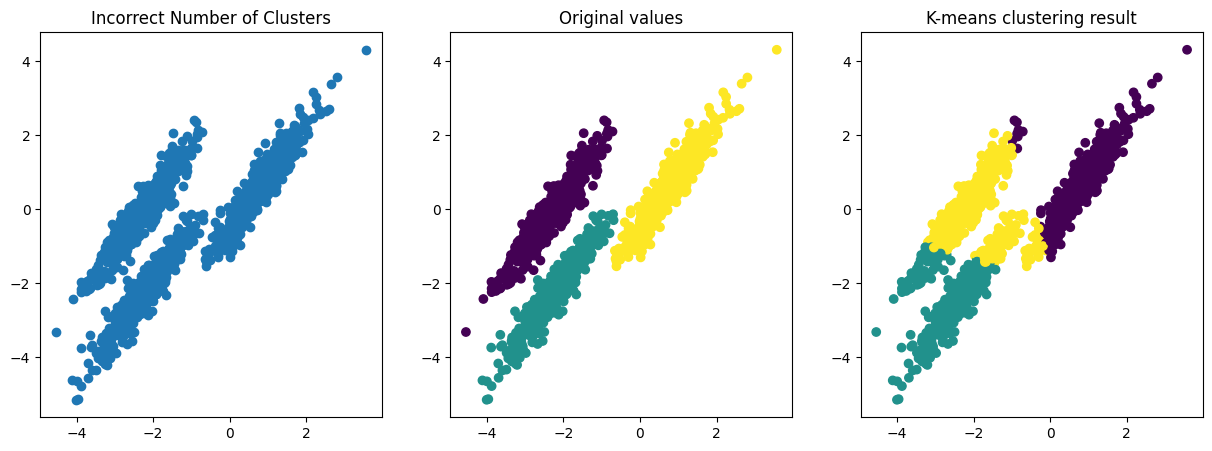

In [ ]:
# Showing the sensitivity of Kmeans for anisotropic data

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=3)
transformation = [[0.5, 0.5], [-0.4, -0.8]]
X_aniso = np.dot(X, transformation)

model = KMeans(n_clusters=3, random_state=random_state, n_init="auto").fit(X_aniso)
y_pred = model.predict(X_aniso)

evaluate_clustering(X, y, y_pred, model)
plot_clustering(X_aniso, y, y_pred)

## Variance

External measures:

- Rand index: 0.84
- Adjusted Rand index: 0.64
- Normalized mutual information: 0.67
- Homogeneity: 0.65
- Completeness: 0.68
- V-measure: 0.67

Internal measures:

- Silhouette Coefficient: 1
- Calinski-Harabasz: 4009
- Davies-Bouldin: 1


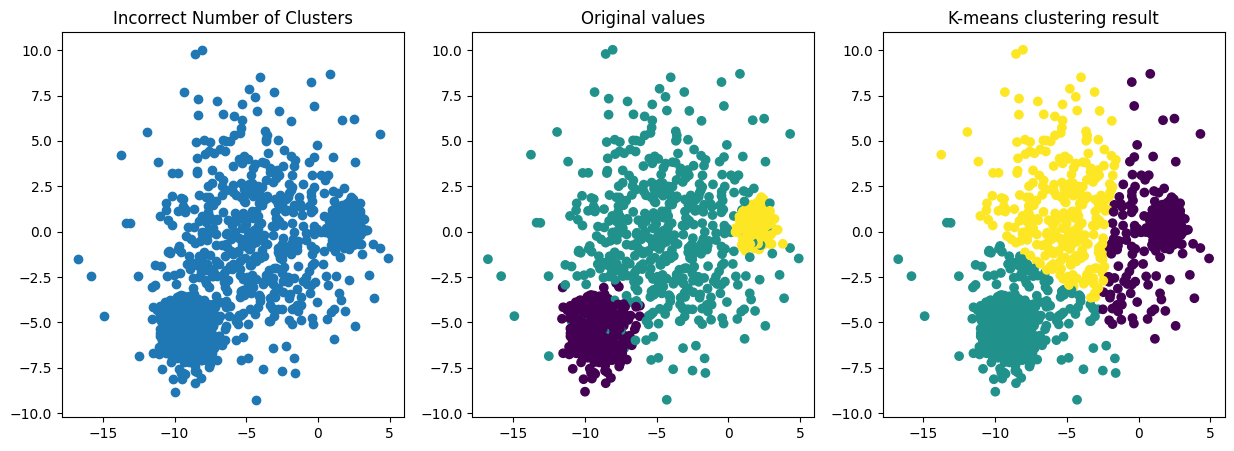

In [ ]:
# Difficulties of Kmeans for variance in variances

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, cluster_std=[1.0, 3.5, 0.5], random_state=random_state, centers=3)
model = KMeans(n_clusters=3, random_state=random_state, n_init="auto").fit(X)
y_pred = model.predict(X)

evaluate_clustering(X, y, y_pred, model)
plot_clustering(X, y, y_pred)